In [ ]:
import pandas as pd
csv_file_path = 'Sample.csv'

df = pd.read_csv(csv_file_path, nrows=5000)

column_names = df.columns.tolist()

print("Column Names:", column_names)
output_csv_file_path = 'Sample_first_5k_rows.csv'
df.to_csv(output_csv_file_path, index=False)

Randomly selected buffer IDs: [1956, 4152, 2832, 3468, 9713, 2116, 3171, 5133, 4872, 8473]


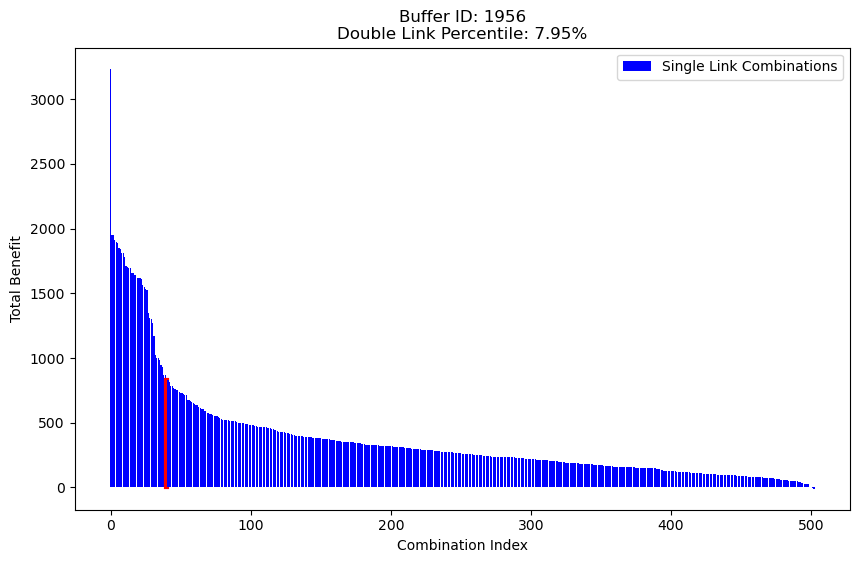

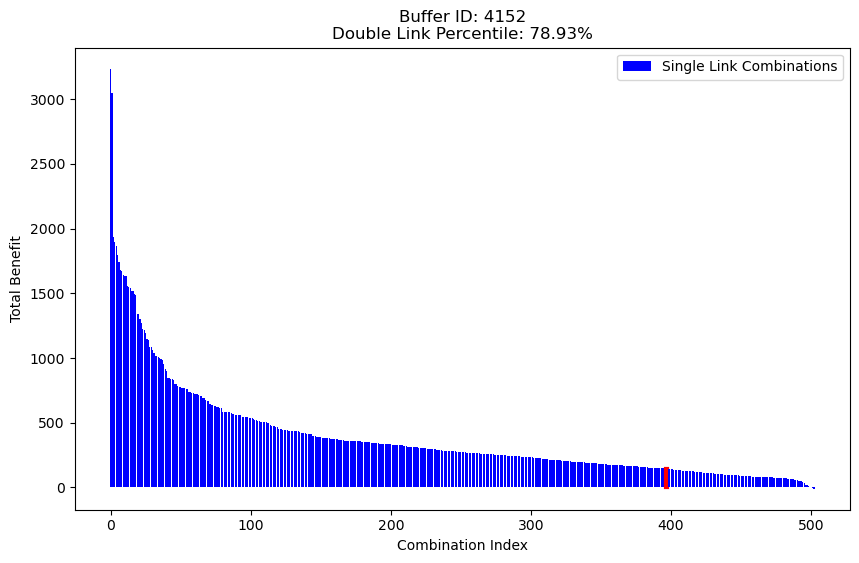

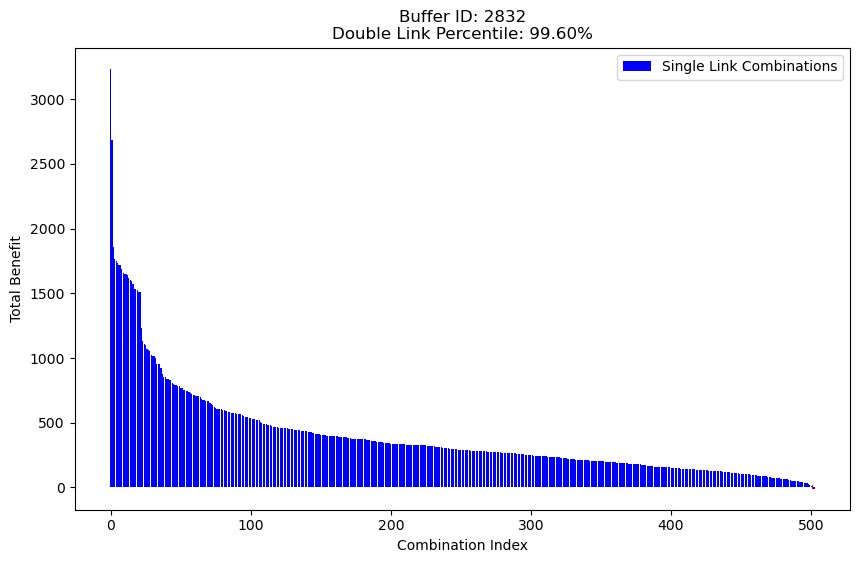

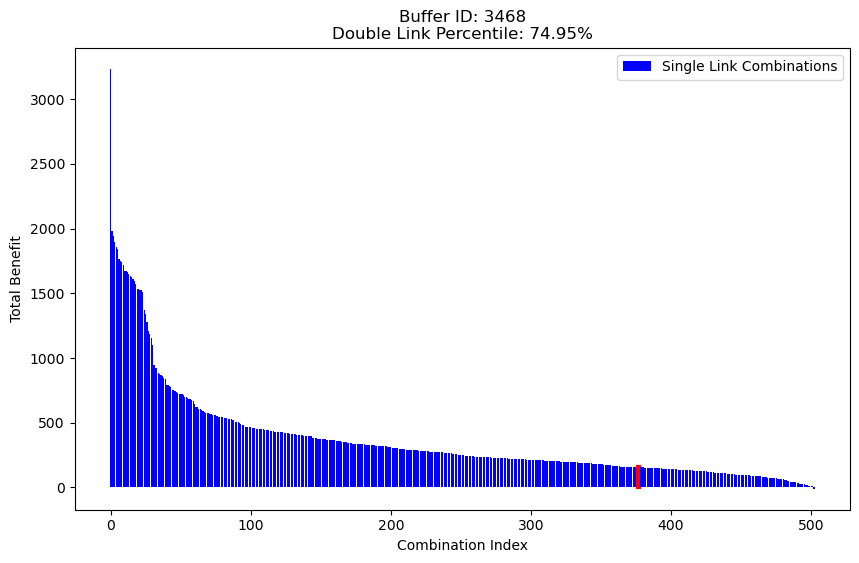

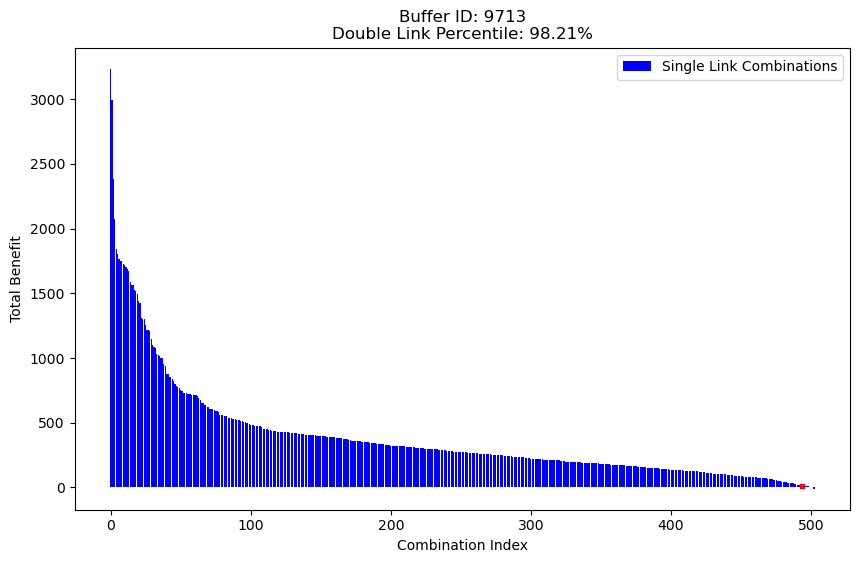

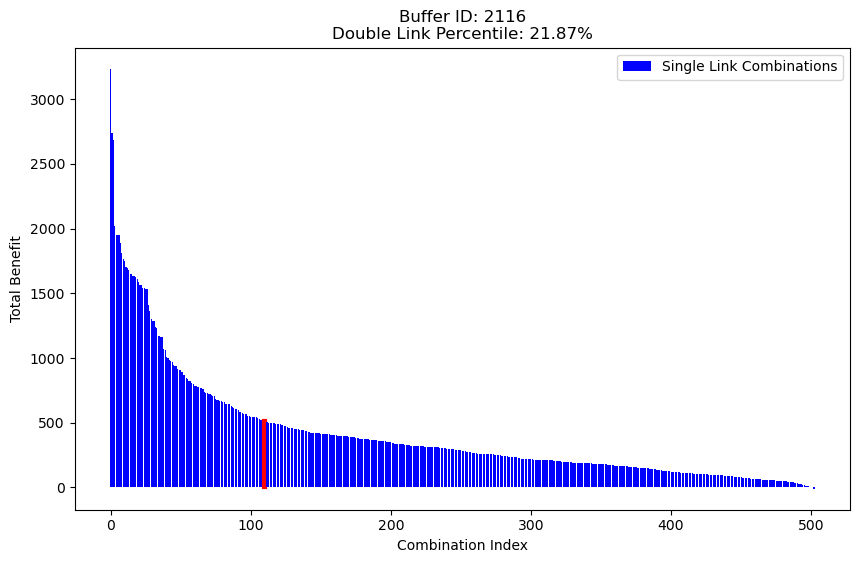

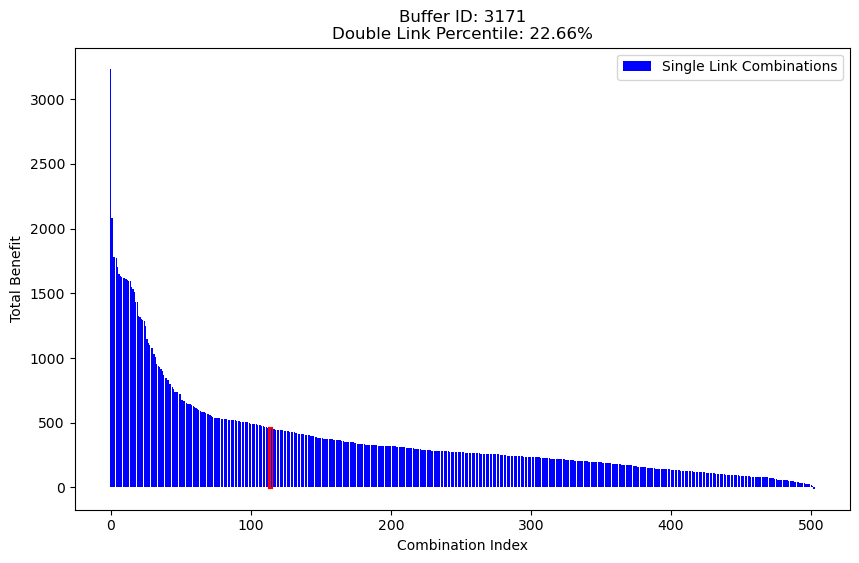

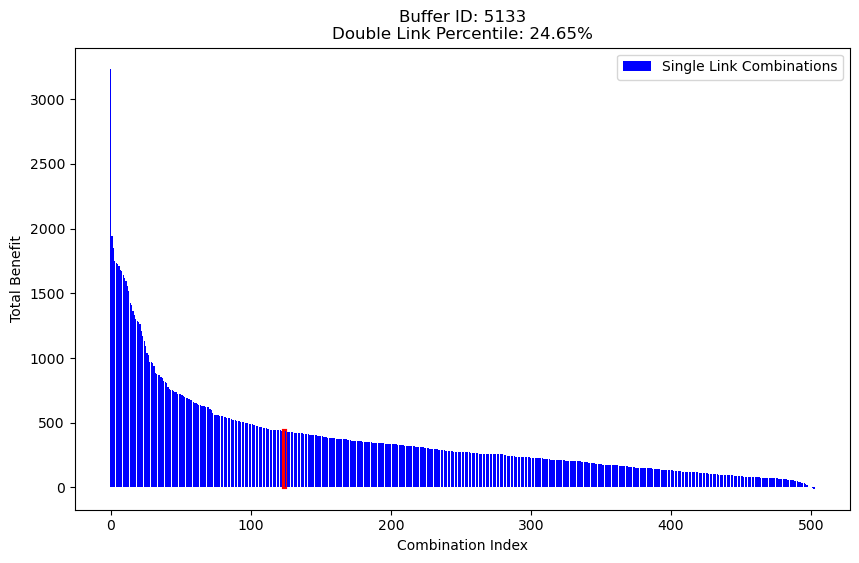

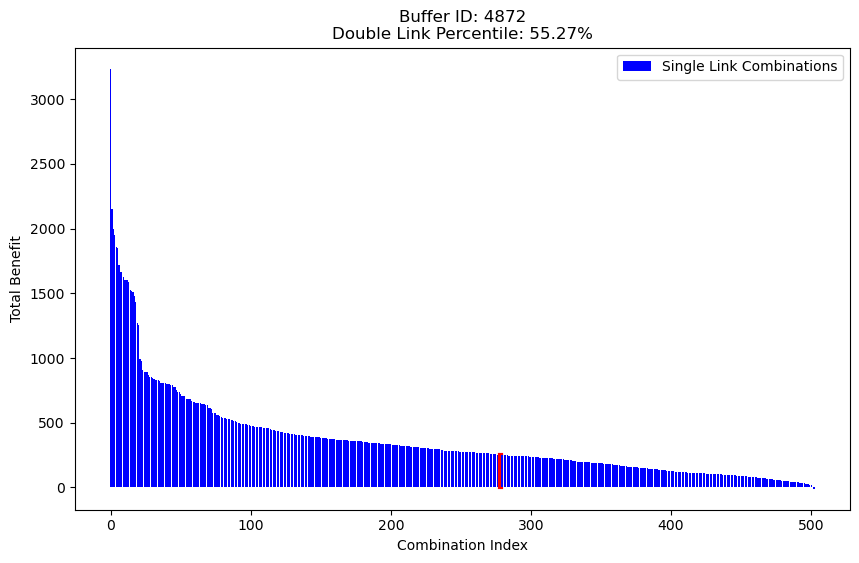

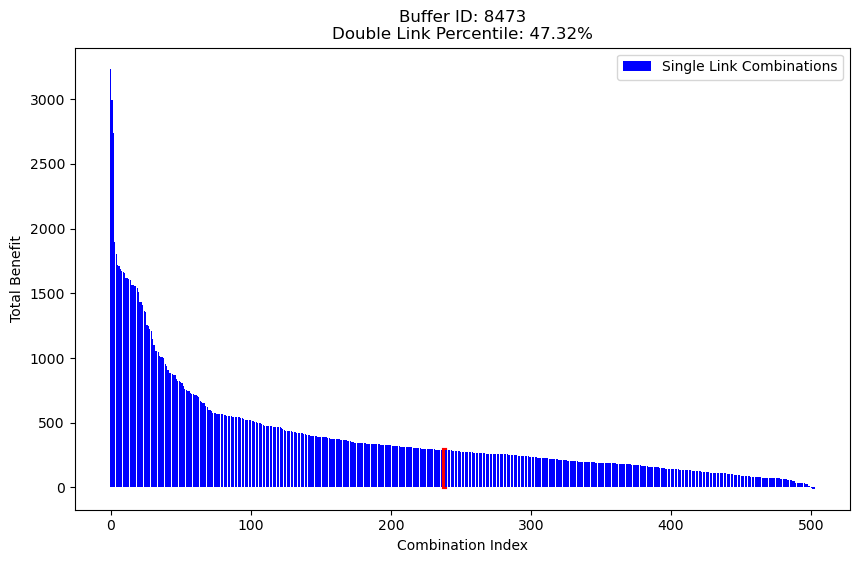

In [5]:
import pandas as pd
import random
import itertools
import matplotlib.pyplot as plt
from tqdm import tqdm

# Read data
data = pd.read_csv('Sample.csv')

# Filter subset where net_mode = 1 and net_mode_0 = 1
data = data[(data['net_mode'] == 1) & (data['net_mode_0'] == 1)]

# Get all unique buffer IDs
unique_buffers = data['idx_1'].unique()

# Randomly select 10 buffers
random_buffers = random.sample(list(unique_buffers), 10)
print("Randomly selected buffer IDs:", random_buffers)

for buffer_id in random_buffers:
    # Filter all single link scenarios within this buffer
    single_link_scenes = data[data['idx_1'] == buffer_id]
    
    # Get the top 2 and bottom 2 single link scenario benefits
    max_single_link_benefits = single_link_scenes['CkDiffBus'].nlargest(2).sum()
    min_single_link_benefits = single_link_scenes['CkDiffBus'].nsmallest(2).sum()
    
    # Get all possible combinations of single link scenarios
    combinations = list(itertools.combinations(single_link_scenes.index, 2))
    
    # Randomly select 500 combinations to calculate their benefits
    random_combinations = random.sample(combinations, 500)
    random_combination_benefits = []
    for combo in random_combinations:
        benefit_1 = single_link_scenes.loc[combo[0], 'CkDiffBus']
        benefit_2 = single_link_scenes.loc[combo[1], 'CkDiffBus']
        total_single_link_benefit = benefit_1 + benefit_2
        random_combination_benefits.append(total_single_link_benefit)
    
    # Get the double link scenario benefit for this buffer
    double_link_benefit = single_link_scenes['CkDiffBus_1'].iloc[0]
    
    # Add double link scenario benefit, max and min single link combination benefits to the list
    random_combination_benefits.append(double_link_benefit)
    random_combination_benefits.append(max_single_link_benefits)
    random_combination_benefits.append(min_single_link_benefits)
    
    # Sort the benefit values
    random_combination_benefits.sort(reverse=True)
    
    # Find the position of the double link scenario benefit in the sorted list
    double_link_position = random_combination_benefits.index(double_link_benefit)
    # Calculate the percentile rank of the double link scenario benefit
    double_link_percentile = (double_link_position / len(random_combination_benefits)) * 100
    
    # Generate bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(random_combination_benefits)), random_combination_benefits, color='blue')
    bars[double_link_position].set_color('red')
    bars[double_link_position].set_linewidth(3)
    plt.xlabel('Combination Index')
    plt.ylabel('Total Benefit')
    plt.title(f'Buffer ID: {buffer_id}\nDouble Link Percentile: {double_link_percentile:.2f}%')
    plt.legend(['Single Link Combinations', 'Double Link Scenario'], loc='upper right')
    plt.show()
